# K Nearrest Neighbors 
[FR]

Dans ce TP, j'utiliserai K Nearest Neighbors pour construire le modèle et puis modeliserai la détection de fraude par carte de crédit.

[EN]
In this analysis, you will be using K Nearest Neighbors to build the model and as the dataset: Credit Card Fraud Detection dataset provided by Kaggle.



## 1. Import libraries

In [268]:
# main libraries
import pandas as pd
import numpy as np

# visual libraries
from matplotlib import pyplot as plt

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler


## 2. Read data


In [269]:
# Read the data in the CSV file using pandas
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [270]:
df.shape

(284807, 31)

## 3. Checking for missing values


In [271]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Find the percentage of samples belonging to each class. 
The dataset is labeled as 0s and 1s. 0 = non fraud and 1 = fraud. 


In [272]:
nb_samples = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/nb_samples
y = len(nonFraud)/nb_samples

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %


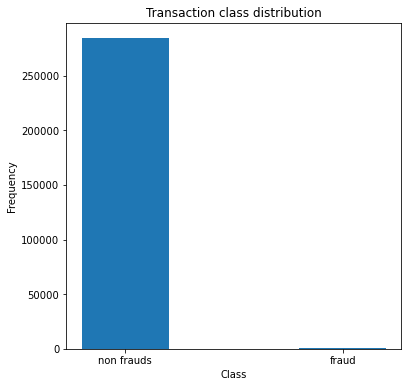

In [273]:
# Plot the bar-plot of the 'Class' attribute
plt.figure(figsize=(6,6))
labels = ['non frauds','fraud']
plt.bar(labels, height = df['Class'].value_counts(), width = 0.4)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

## Observations


Enter here your Observation

## 4. Balance the dataset

hint: Since the data is highly imbalanced, take only 492 rows from the non_fraud transactions.

In [274]:
# Shuffle the data before creating the subsamples
df = df.sample(frac=1)

In [275]:
#create a new dataframe containing only the non-frauds transactions
non_frauds = df[df['Class'] == 0]

In [276]:
#create a new dataframe containing only the frauds transactions
frauds = df[df['Class'] == 1]

In [277]:
# take only 492 rows from the non_fraud transactions.
non_frauds = df[df['Class'] == 0][:492]

In [278]:
#concatenate the new dataframes to get a balanced dataset
new_df = pd.concat([non_frauds, frauds])

In [279]:
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106679,70071.0,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,-1.801937,...,0.764187,-0.275578,-0.343572,0.233085,0.606434,-0.315433,0.768291,0.459623,227.30,1
87353,61646.0,-1.760224,0.178018,2.036873,-1.236962,-0.885943,-0.431419,0.063470,0.511369,0.395058,...,0.296386,0.898046,-0.016801,0.578932,0.670496,-0.538449,-0.083493,-0.052273,89.76,0
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00,1
30114,35778.0,-1.224330,1.355936,1.244038,1.227976,-0.247340,0.303546,0.276756,0.566460,-0.715876,...,0.073032,0.347085,-0.133382,0.245556,0.147322,-0.226037,0.007530,0.105288,32.25,0
87231,61592.0,0.820056,-0.390922,0.614128,1.423590,-0.773424,-0.375715,-0.034618,0.008243,0.264006,...,0.310756,0.565251,-0.194431,0.411168,0.414038,-0.227803,0.014652,0.055201,174.15,0


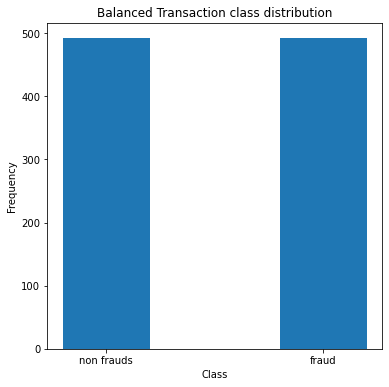

In [280]:
# Plot the bar-plot of the 'Class' attribute
plt.figure(figsize=(6,6))
labels = ['non frauds','fraud']
plt.bar(labels, height = new_df['Class'].value_counts(), width = 0.4)
plt.title("Balanced Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [282]:
# split features and labels
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

## 5. Standardize the data
 

In [283]:
# Standardizing all the features 
scaled_features = StandardScaler().fit_transform(features)


## 6. Data splitting

In [291]:
# splitting the feature array and label array keeping 80% for the trainnig sets
X_train,X_test,y_train,y_test = train_test_split(scaled_features,labels,test_size=0.20)



In [298]:
#shape of training samples and training labels 
print("training samples shape: ",X_train.shape)
print("training labels shape: ",y_train.shape)

training samples shape:  (787, 30)
training labels shape:  (787, 1)


In [294]:
#shape of testing samples and testing labels 
print("testing samples shape: ",X_test.shape)
print("testing labels shape: ",y_test.shape)

testing samples shape:  (197, 30)
testing labels shape:  (197, 1)


## 7. Build KNN model

Find the optimal number of neighbors K (from 2 to 25) to get the best KNN model classifier.

In [315]:
# Create a list with values from 3 to 24
neighbours = np.arange(2,26)

# Create 2 empty lists for train_accuracy and test_accuracy
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

# Using a for loop, iterate through the 25 possibilities
# At each iteration:
    # Create a KNN classifier with the current number of neighbors
    # Train the KNN classifier
    # Compute accuracy on the training set and append it to the corresponding list
    # Compute accuracy on the test set and append it to the corresponding list
for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train,np.array(y_train).ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, np.array(y_train).ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, np.array(y_test).ravel()) 

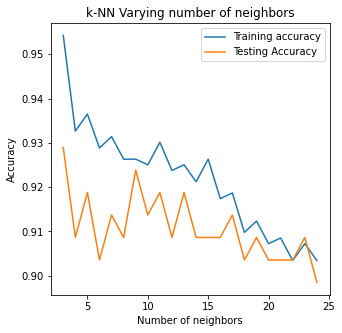

In [316]:
#Generate a plot showing the Training and Testing accuracy in function of the parameter K
plt.figure(figsize=(5,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [317]:
#Print the list of test accuracy for the different hyperparameter k
test_accuracy

array([0.92893401, 0.90862944, 0.91878173, 0.9035533 , 0.91370558,
       0.90862944, 0.92385787, 0.91370558, 0.91878173, 0.90862944,
       0.91878173, 0.90862944, 0.90862944, 0.90862944, 0.91370558,
       0.9035533 , 0.90862944, 0.9035533 , 0.9035533 , 0.9035533 ,
       0.90862944, 0.89847716])

In [329]:
# find the optimal nunmber of neighbors (K) maximizing the testing accuracy
idx = np.where(test_accuracy == max(test_accuracy))
k = neighbours[idx][0]

In [330]:
k

3

## 8. Build a KNN model with the optimal number of neighbors

In [331]:
#k_nearest_neighbours_classification
k = 3
knn=KNeighborsClassifier(k)
knn.fit(X_train,np.array(y_train).ravel())

KNeighborsClassifier(n_neighbors=3)

In [332]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

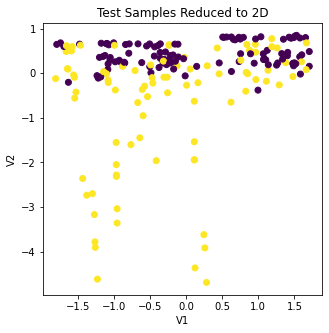

In [339]:
#plot the different testing samples (using only the first 2 features in a 2D-space)
# and color them based on their prediccted class
plt.figure(figsize=(5,5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels, label =['Fraud', 'Non-Fraud'])
plt.title("Test Samples Reduced to 2D")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()


## Model Evaluation

In [334]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)


In [335]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)

print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.9289340101522843
Precison --> 0.989010989010989
Recall --> 0.8737864077669902
F1 --> 0.9278350515463917
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        94
           1       0.99      0.87      0.93       103

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


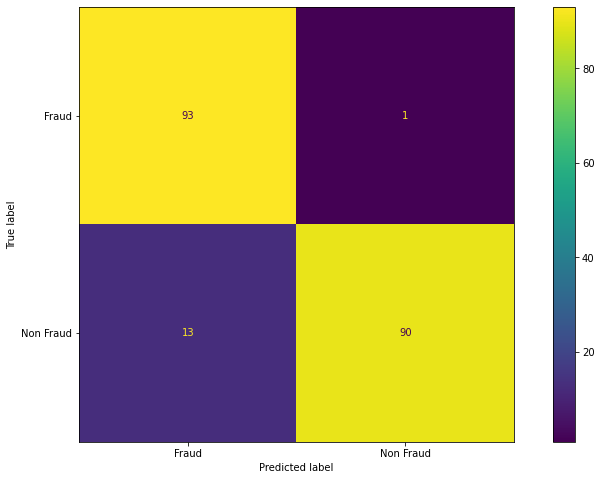

In [336]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, display_labels =np.array(['Fraud', 'Non Fraud']))


In [337]:
# save the model to disk
import pickle
filename = 'finalized_model.pkl'
f = open(filename, 'wb')

pickle.dump(knn, f)

In [338]:
# load the model from disk
filename = 'finalized_model.pkl'
f = open(filename, 'rb')
knn = pickle.load(f)